### quality of products
this notebook is TRYING to perform an analysis related to the quality of products
the first task at hand is to join the datasets related to quality. Those are: order_items_dataset to products_dataset and order_reviews_dataset


In [16]:
pip install umap-learn

   ---------------------------------------- 0.0/88.8 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/88.8 kB ? eta -:--:--
   ------------------------------------ --- 81.9/88.8 kB 919.0 kB/s eta 0:00:01
   ---------------------------------------- 88.8/88.8 kB 835.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/56.9 kB ? eta -:--:--
   ---------------------------------------- 56.9/56.9 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install plotly

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import umap
import plotly

from preprocessing.utils import join_dataframes

In [3]:
# Revert matplotlib settings to default
plt.rcParams.update(plt.rcParamsDefault)

In [4]:
order_items_dataset_done = pd.read_csv('./data/processed/order_items_dataset_done.csv', index_col=0)
order_reviews_dataset_done = pd.read_csv('./data/processed/order_reviews_dataset_done.csv', index_col=0)
orders_dataset_done = pd.read_csv('./data/processed/orders_dataset_done.csv', index_col=0)
products_dataset_done = pd.read_csv('./data/processed/products_dataset_done.csv', index_col=0)

firstly we join two datasets (orders and reviews, hence the creative name) sharing a common order_id

In [5]:
orders_reviews = join_dataframes(
   [orders_dataset_done, order_reviews_dataset_done],
   [{'order_id': 'order_id'}, {'order_id': 'order_id'}] 
)
orders_reviews

,order_id,customer_id_0,order_purchase_timestamp_0,order_approved_at_0,order_delivered_carrier_date_0,order_delivered_customer_date_0,order_estimated_delivery_date_0,order_purchase_delivered_days_0,order_estimated_actual_delivered_days_0,review_id_1,review_score_1,review_comment_title_1,review_comment_message_1,review_creation_date_1,review_answer_timestamp_1,review_creation_answer_time_hours_1,review_score_extended_1
12,0006ec9db01a64e59a68b2c340bf65a7,5d178120c29c61748ea95bac23cb8f25,2018-07-24 17:04:17,2018-07-24 17:24:20,2018-07-25 11:02:00,2018-07-31 01:04:15,2018-08-22,6.333310,-21.955382,6322c405c0f34bf3ad870fd1a6b1fced,5.0,Boa,Excelente serviço de compras on line.,2018-07-31 00:00:00,2018-08-01 23:05:10,47.086111,6.0
16,000aed2e25dbad2f9ddb70584c5a2ded,fff5169e583fd07fac9fec88962f189d,2018-05-11 20:33:38,2018-05-11 20:57:03,2018-05-16 14:26:00,2018-05-18 16:46:31,2018-05-22,6.842280,-3.301030,00800678dcf28b0ea0caef2147b6945d,1.0,produto não entregue,Mudo minha opinião assim que receber o produto...,2018-05-19 00:00:00,2018-05-22 10:52:24,82.873333,0.0
28,00130c0eee84a3d909e75bc08c5c3ca1,47d656c08a282ec5ab4c1f18303a3a30,2018-06-11 21:17:00,2018-06-12 05:16:24,2018-06-12 14:22:00,2018-06-13 15:28:25,2018-06-20,1.757928,-6.355266,4ff9a24999699f7104ed23fec2563351,5.0,Super Recomendo,"Produto entregue adequadamente e muito rápido,...",2018-06-14 00:00:00,2018-06-14 19:50:09,19.835833,6.0
47,001e7cf2ad6bef3ade12ebc56ceaf0f3,d1684ed69f8fd574b7c344de923f379a,2018-05-19 10:29:23,2018-05-19 10:59:50,2018-05-21 14:34:00,2018-06-04 18:08:23,2018-06-05,16.318750,-0.244178,048baba3f11436d12b06dab572aafc21,1.0,Pessima,O produto chegou e estragou sozinho,2018-06-05 00:00:00,2018-06-06 19:01:54,43.031667,0.0
50,002175704e8b209f61b9ad5cfd92b60e,a562db3c7cb9a68947debd30879b491e,2018-04-22 12:13:25,2018-04-24 17:24:48,2018-04-23 19:03:19,2018-05-02 20:38:44,2018-05-14,10.350914,-11.139769,78412bf6c796b43df999fd87750d28ea,4.0,Recomendo,Produto como descrito. Mas não gostei pq o som...,2018-05-03 00:00:00,2018-05-06 13:42:10,85.702778,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98305,ffc49b9c9d666410e9ecdb0a3efadb9c,e175dcb4b025365a33467693abf7b4ca,2018-05-28 19:29:49,2018-05-28 19:56:23,2018-05-29 14:04:00,2018-06-12 18:57:37,2018-07-11,14.977639,-28.209988,9125fc0da2be5d6f52e107184a7f49c1,5.0,Recomendo,Recebi o produto tudo certo.\r\nRecebi em 10 d...,2018-06-13 00:00:00,2018-06-17 22:38:40,118.644444,6.0
98310,ffcb98e21b0bf085baf42b16a67732ef,d5b03af823742e307896a30d43e41340,2018-06-06 14:25:51,2018-06-06 14:53:16,2018-06-06 19:02:00,2018-06-12 17:03:31,2018-07-03,6.109491,-20.289225,38746e8fc612cf700a2e1bffd8412a39,5.0,Recomendo,Muito satisfeita,2018-06-13 00:00:00,2018-06-13 20:28:42,20.478333,6.0
98321,ffd6f465cab015b452d398ac1f5d978a,0b5f60cff1a206e0bc33c120b8db0335,2018-04-23 19:33:08,2018-04-24 17:28:54,2018-04-25 14:07:00,2018-05-03 20:52:40,2018-05-29,10.055231,-25.130093,cb864e5bb7299e87df2bf1eb66fddbcd,4.0,Ótimo,"O produto chegou antes da data prevista, é tud...",2018-05-04 00:00:00,2018-05-05 01:32:43,25.545278,4.0
98344,ffe48cb3d8485e0cb0405e21192e592f,c7d443bf742505394e4431d332fa5744,2018-06-29 18:11:54,2018-06-29 18:30:38,2018-07-02 14:06:00,2018-07-12 14:38:38,2018-08-01,12.851898,-19.389838,3e46e959e03570ecdd743b9736758c54,3.0,Recomendo,"Encomendem um pouco mais, não tem o tamanho in...",2018-07-13 00:00:00,2018-07-13 18:07:36,18.126667,3.0


then we do the same on datasets items amd products which share product_id

In [6]:
items_products = join_dataframes(
    [order_items_dataset_done, products_dataset_done],
    [{'product_id': 'product_id'}, {'product_id': 'product_id'}]
)
items_products

,product_id,order_id_0,order_item_id_0,seller_id_0,shipping_limit_date_0,price_0,freight_value_0,product_category_name_1,product_name_lenght_1,product_description_lenght_1,product_photos_qty_1,product_weight_g_1,product_length_cm_1,product_height_cm_1,product_width_cm_1,product_volume_cm3_1
0,00066f42aeeb9f3007548bb9d3f33c38,f30149f4a8882a08895b6a242aa0d612,1.0,5670f4db5b62c43d542e1b2d56b0cf7c,2018-05-24 18:58:59,101.65,18.590,perfumery,53.0,596.0,6.0,300.0,20.0,16.0,16.0,5120.0
1,00088930e925c41fd95ebfe695fd2655,f5eda0ded77c1293b04c953138c8331d,1.0,7142540dd4c91e2237acb7e911c4eba2,2017-12-18 19:32:19,129.90,13.930,auto,56.0,752.0,4.0,1225.0,55.0,10.0,26.0,14300.0
2,0009406fd7479715e4bef61dd91f2462,0bf736fd0fd5169d60de3699fcbcf986,1.0,4a3ca9315b744ce9f8e9374361493884,2017-12-29 16:12:36,229.00,13.100,bed_bath_table,50.0,266.0,2.0,300.0,45.0,15.0,35.0,23625.0
3,000b8f95fcb9e0096488278317764d19,3aba44d8e554ab4bb8c09f6f78032ca8,1.0,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-07 22:15:19,58.90,19.600,housewares,25.0,364.0,3.0,550.0,19.0,24.0,12.0,5472.0
4,000d9be29b5207b54e86aa1b1ac54872,a6c1ae4d48280b5b3c43231ac6afd701,1.0,8ae520247981aa06bc94abddf5f46d34,2018-04-09 10:09:40,199.00,19.270,watches_gifts,48.0,613.0,4.0,250.0,22.0,11.0,15.0,3630.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29801,fff1059cd247279f3726b7696c66e44e,7c8ef607483d6add6bd812fcb934dca9,1.0,5b67882648febfb6e1225e6ad7164f6b,2018-04-18 21:51:43,89.99,16.320,sports_leisure,53.0,285.0,1.0,421.0,16.0,13.0,16.0,3328.0
29804,fff6177642830a9a94a0f2cba5e476d1,e91d77b27ccd3bac6b23a34a44ae3db1,1.0,7a67c85e85bb2ce8582c35f2203ad736,2017-09-11 11:45:17,109.99,17.020,cool_stuff,54.0,842.0,1.0,1400.0,42.0,25.0,15.0,15750.0
29805,fff81cc3158d2725c0655ab9ba0f712c,68be5488c0fe6f10d9fcf87080556f7c,1.0,778323240ce2830d68aab11794e00bfb,2018-08-03 09:31:10,90.00,7.890,health_beauty,54.0,643.0,1.0,58.0,16.0,16.0,11.0,2816.0
29806,fff9553ac224cec9d15d49f5a263411f,df3a7600e4fd0a2c595fa7ad6e2e622e,1.0,643214e62b870443ccbe55ab29a4dccf,2017-10-13 02:28:11,32.00,11.850,fashion_bags_accessories,22.0,328.0,3.0,150.0,16.0,13.0,11.0,2288.0


finally we join two created datasets combining four different datasets
surely this could be done faster, but this way it's easier for me :)

In [7]:
quality = join_dataframes(
    [orders_reviews, items_products],
    [{'order_id': 'order_id_0'}, {'order_id': 'order_id_0'}]
)
quality

,order_id_0,customer_id_0_0,order_purchase_timestamp_0_0,order_approved_at_0_0,order_delivered_carrier_date_0_0,order_delivered_customer_date_0_0,order_estimated_delivery_date_0_0,order_purchase_delivered_days_0_0,order_estimated_actual_delivered_days_0_0,review_id_1_0,...,freight_value_0_1,product_category_name_1_1,product_name_lenght_1_1,product_description_lenght_1_1,product_photos_qty_1_1,product_weight_g_1_1,product_length_cm_1_1,product_height_cm_1_1,product_width_cm_1_1,product_volume_cm3_1_1
51,003cc6161d7a2593f2525cce0c330d32,7d9802889236ab8fc541bfb438978cd7,2018-08-03 19:33:35,2018-08-03 20:04:14,2018-08-06 15:02:00,2018-08-07 11:32:11,2018-08-08,3.665694,-0.519317,4910a0d41fca570cb921f0090ed5c4f8,...,14.395000,housewares,52.0,827.0,1.0,1800.0,30.0,30.0,30.0,27000.0
55,004345d16a1ab2c21962992c721c8643,3b723b649feb48f3cfbb9c728efb3d7d,2018-07-04 06:45:05,2018-07-05 16:09:18,2018-07-05 14:08:00,2018-07-11 17:26:37,2018-07-30,7.445509,-18.273183,7f05ffaf413a01b93e9cbe3e527a91ab,...,15.370000,housewares,47.0,390.0,3.0,525.0,18.0,19.0,16.0,5472.0
68,00611822267e76e0055c25c18506f06e,8832232b097dba67d540a76f6ba88795,2018-07-26 13:35:01,2018-07-26 13:50:14,2018-07-26 14:24:00,2018-07-31 22:52:44,2018-08-20,5.387303,-19.046713,09e73c4728b6052f2a9fd5ee7b6221f8,...,20.310000,toys,46.0,1533.0,6.0,350.0,25.0,16.0,16.0,6400.0
100,0091a677651feaf5a08d7bb147681e14,93d82c58a8f2b0d2db80f16867b99edd,2018-08-24 13:27:17,2018-08-24 13:44:42,2018-08-27 18:33:00,2018-08-28 16:32:05,2018-08-31,4.128333,-2.311053,3377008b1325b226aed063d454f83fb7,...,10.143333,watches_gifts,60.0,272.0,5.0,300.0,16.0,2.0,11.0,352.0
104,0094bd07f49fed90209ffa62d1ef26d6,de0c1a4d8c367c58d66e61dfa379f4cf,2018-05-01 02:04:16,2018-05-03 04:12:53,2018-05-10 19:19:00,2018-05-16 21:12:15,2018-05-14,15.797211,2.883507,fa2ea06b0117bc5461c5f7d963d6c614,...,7.390000,perfumery,23.0,193.0,1.0,100.0,16.0,11.0,11.0,1936.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27358,ff1037c14208a18e7482c6c7a988799f,5b29cab1b79b6ffde4d50351e4f85ccb,2018-08-25 15:08:14,2018-08-25 15:24:22,2018-08-27 14:19:00,2018-08-28 19:40:53,2018-08-30,3.189340,-1.179942,dd461c0e9d64bcd8fdf97aecdd6e9471,...,7.420000,housewares,41.0,243.0,1.0,400.0,16.0,11.0,14.0,2464.0
27375,ff4ce1bf027da9b8b1eaa0c10148cc2d,69c365a0670ed7250de9cb2d600109f4,2018-07-01 15:28:33,2018-07-01 15:49:56,2018-07-03 07:32:00,2018-07-11 18:58:37,2018-07-24,10.145880,-12.209294,ab3c521daf4e310b8426f082d9ee1665,...,14.510000,furniture_decor,39.0,578.0,2.0,3450.0,38.0,28.0,28.0,29792.0
27411,ffcb98e21b0bf085baf42b16a67732ef,d5b03af823742e307896a30d43e41340,2018-06-06 14:25:51,2018-06-06 14:53:16,2018-06-06 19:02:00,2018-06-12 17:03:31,2018-07-03,6.109491,-20.289225,38746e8fc612cf700a2e1bffd8412a39,...,7.510000,furniture_decor,27.0,332.0,1.0,1750.0,23.0,23.0,16.0,8464.0
27414,ffd6f465cab015b452d398ac1f5d978a,0b5f60cff1a206e0bc33c120b8db0335,2018-04-23 19:33:08,2018-04-24 17:28:54,2018-04-25 14:07:00,2018-05-03 20:52:40,2018-05-29,10.055231,-25.130093,cb864e5bb7299e87df2bf1eb66fddbcd,...,22.060000,christmas_supplies,39.0,258.0,1.0,250.0,16.0,12.0,11.0,2112.0


In [8]:
quality.isna().sum()

order_id_0                                   0
customer_id_0_0                              0
order_purchase_timestamp_0_0                 0
order_approved_at_0_0                        0
order_delivered_carrier_date_0_0             0
order_delivered_customer_date_0_0            0
order_estimated_delivery_date_0_0            0
order_purchase_delivered_days_0_0            0
order_estimated_actual_delivered_days_0_0    0
review_id_1_0                                0
review_score_1_0                             0
review_comment_title_1_0                     0
review_comment_message_1_0                   0
review_creation_date_1_0                     0
review_answer_timestamp_1_0                  0
review_creation_answer_time_hours_1_0        0
review_score_extended_1_0                    0
product_id_1                                 0
order_item_id_0_1                            0
seller_id_0_1                                0
shipping_limit_date_0_1                      0
price_0_1    

c:\Users\Ida\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Ida\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Ida\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Ida\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Ida\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: Future

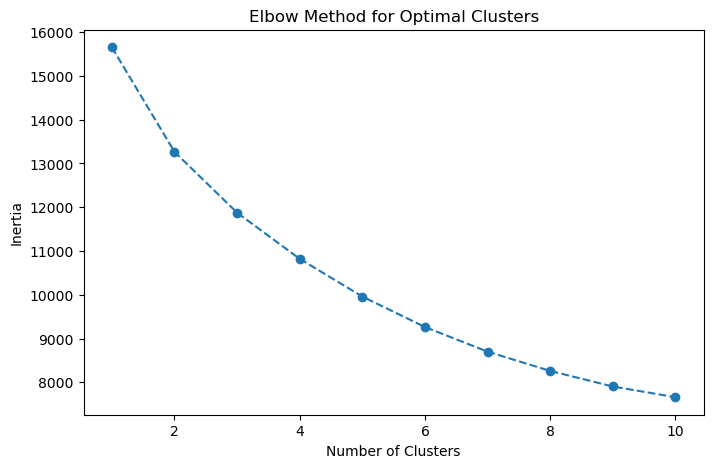

In [29]:
numeric_features = [
    'order_purchase_delivered_days_0_0',
    'order_estimated_actual_delivered_days_0_0',
    "review_score_extended_1_0",
    'product_description_lenght_1_1',
    'product_photos_qty_1_1',
    'product_weight_g_1_1',
    'product_volume_cm3_1_1',
    "price_0_1"
]


data = quality[numeric_features]

scaler = StandardScaler()
quality_scaled = scaler.fit_transform(data)


inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=2137)
    kmeans.fit(quality_scaled)
    inertia.append(kmeans.inertia_)

# Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Since the plot of the elbow curve turned out to be smooth, it is hard to determine the appropriate number of clusters. Another approach to get the optimal number of clusters can be Silhouette Analysis or Davies-Bouldin Index

c:\Users\Ida\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Ida\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Ida\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Ida\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Ida\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: Future

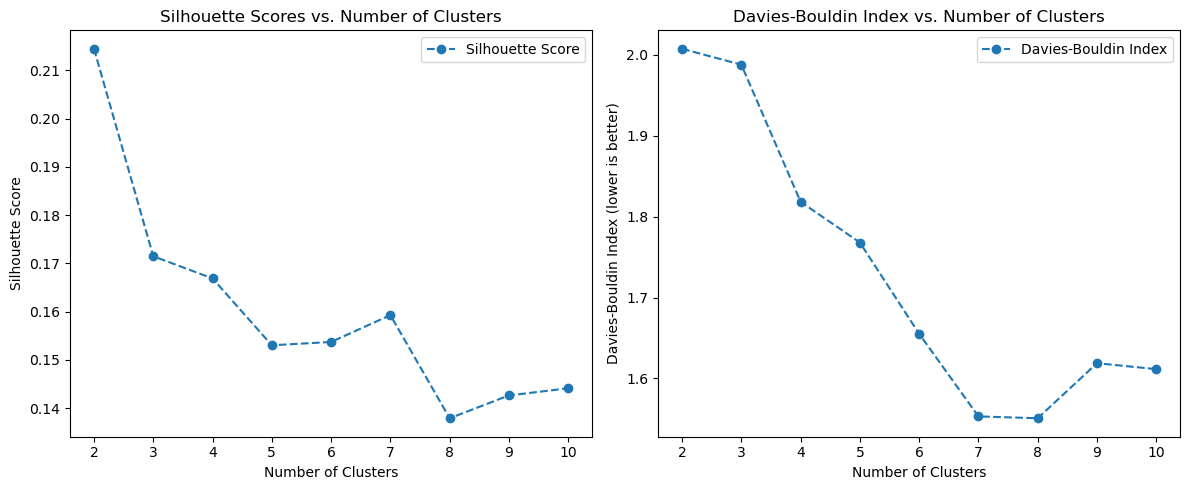

In [30]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

def evaluate_clusters(data, max_clusters=10):
    silhouette_scores = []
    davies_bouldin_scores = []
    for k in range(2, max_clusters + 1):  # we start with two clusters
        kmeans = KMeans(n_clusters=k, random_state=37)
        clusters = kmeans.fit_predict(data)
        
        # Silhouette Score
        silhouette_avg = silhouette_score(data, clusters)
        silhouette_scores.append(silhouette_avg)
        
        # Davies-Bouldin Index
        db_score = davies_bouldin_score(data, clusters)
        davies_bouldin_scores.append(db_score)
    
    return silhouette_scores, davies_bouldin_scores

# Evaluate clustering
silhouette_scores, davies_bouldin_scores = evaluate_clusters(quality_scaled, max_clusters=10)

# Plot Silhouette Scores
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', label='Silhouette Score')
plt.title('Silhouette Scores vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()

# Plot Davies-Bouldin Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), davies_bouldin_scores, marker='o', linestyle='--', label='Davies-Bouldin Index')
plt.title('Davies-Bouldin Index vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index (lower is better)')
plt.legend()
plt.tight_layout()
plt.show()

from the Silhouette Score we should choose the number of clusters with the highest score, whereas for Davies-Bouldin method it is the opposite - the lowest score. 
Graphs would suggest to set n = 7


In [31]:
optimal_clusters = 7
kmeans = KMeans(n_clusters=optimal_clusters, random_state=12)
clusters = kmeans.fit_predict(quality_scaled)

#cluster labels for the original dataset
quality['Cluster'] = clusters

# cluster characteristics
cluster_summary = quality.groupby('Cluster')[numeric_features].mean()
print(cluster_summary)

c:\Users\Ida\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



         order_purchase_delivered_days_0_0  \
Cluster                                      
0                                19.006522   
1                                 8.259685   
2                                 7.224940   
3                                 7.474373   
4                                 7.888673   
5                                 7.001547   
6                                 6.439754   

         order_estimated_actual_delivered_days_0_0  review_score_extended_1_0  \
Cluster                                                                         
0                                        -4.616467                   3.412281   
1                                       -11.970647                   4.470817   
2                                       -10.930220                   4.779736   
3                                       -13.395850                   0.694981   
4                                       -14.714135                   5.063415   
5                 

c:\Users\Ida\anaconda3\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



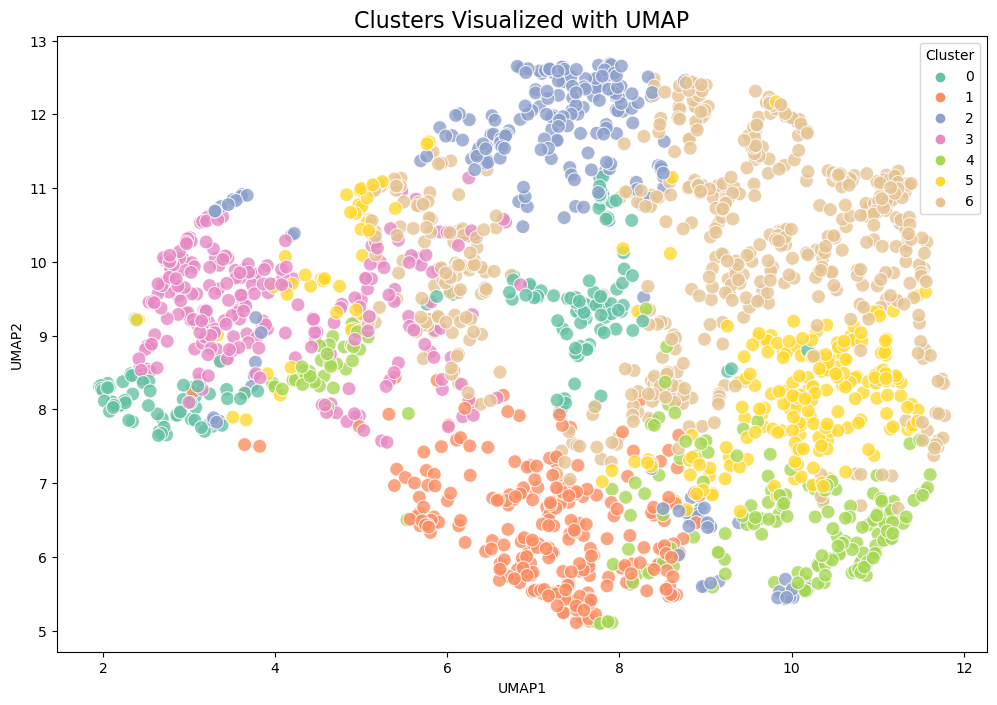

In [32]:
umap_reducer = umap.UMAP(random_state=42, n_neighbors=15, min_dist=0.1)
umap_embedding = umap_reducer.fit_transform(quality_scaled)

umap_df = pd.DataFrame(umap_embedding, columns=['UMAP1', 'UMAP2'])
umap_df['Cluster'] = clusters

# UMAP projection with clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='UMAP1', y='UMAP2', hue='Cluster', data=umap_df, palette='Set2', s=100, alpha=0.8
)
plt.title('Clusters Visualized with UMAP', fontsize=16)
plt.legend(title='Cluster', loc='best')
plt.show()

In [33]:
umap_reducer_3d = umap.UMAP(random_state=42, n_neighbors=15, min_dist=0.1, n_components=3)
umap_embedding_3d = umap_reducer_3d.fit_transform(quality_scaled)
# Use Plotly for 3D visualization
import plotly.express as px
umap_df_3d = pd.DataFrame(umap_embedding_3d, columns=['UMAP1', 'UMAP2', 'UMAP3'])
umap_df_3d['Cluster'] = clusters
fig = px.scatter_3d(umap_df_3d, x='UMAP1', y='UMAP2', z='UMAP3', color='Cluster')
fig.update_traces(marker=dict(size=5))
fig.show()


c:\Users\Ida\anaconda3\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



c:\Users\Ida\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Ida\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Ida\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Ida\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Ida\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: Future

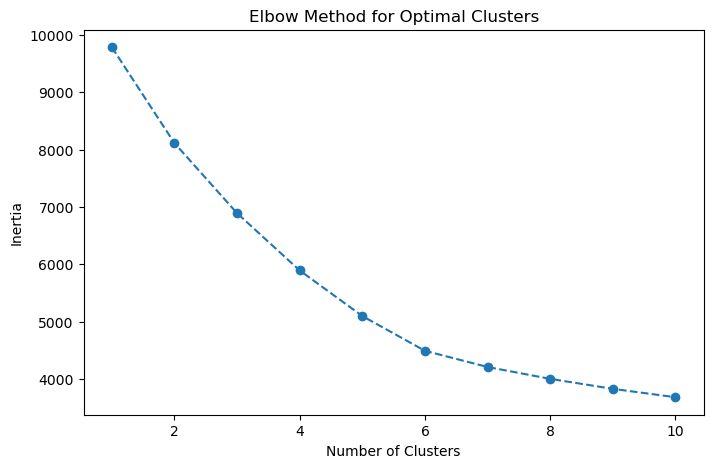

In [34]:
numeric_features = [
    'order_purchase_delivered_days_0_0',
    'order_estimated_actual_delivered_days_0_0',
    "review_score_extended_1_0",
    'product_photos_qty_1_1',
    "price_0_1"
]


data = quality[numeric_features]

scaler = StandardScaler()
quality_scaled = scaler.fit_transform(data)


inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=2137)
    kmeans.fit(quality_scaled)
    inertia.append(kmeans.inertia_)

# Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

c:\Users\Ida\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Ida\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Ida\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Ida\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Ida\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: Future

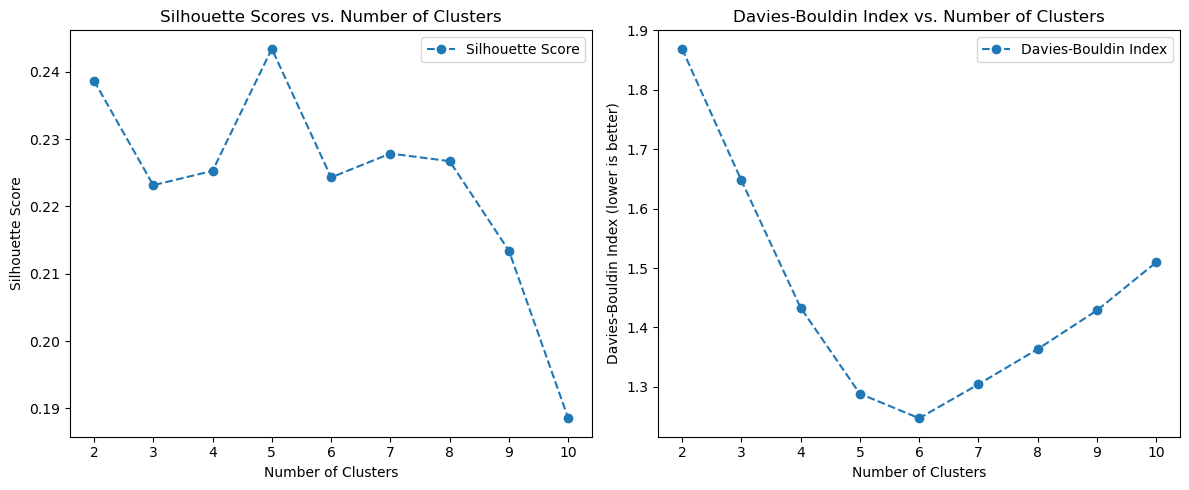

In [35]:
def evaluate_clusters(data, max_clusters=10):
    silhouette_scores = []
    davies_bouldin_scores = []
    for k in range(2, max_clusters + 1):  # we start with two clusters
        kmeans = KMeans(n_clusters=k, random_state=37)
        clusters = kmeans.fit_predict(data)
        
        # Silhouette Score
        silhouette_avg = silhouette_score(data, clusters)
        silhouette_scores.append(silhouette_avg)
        
        # Davies-Bouldin Index
        db_score = davies_bouldin_score(data, clusters)
        davies_bouldin_scores.append(db_score)
    
    return silhouette_scores, davies_bouldin_scores

# Evaluate clustering
silhouette_scores, davies_bouldin_scores = evaluate_clusters(quality_scaled, max_clusters=10)

# Plot Silhouette Scores
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', label='Silhouette Score')
plt.title('Silhouette Scores vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()

# Plot Davies-Bouldin Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), davies_bouldin_scores, marker='o', linestyle='--', label='Davies-Bouldin Index')
plt.title('Davies-Bouldin Index vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index (lower is better)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=12)
clusters = kmeans.fit_predict(quality_scaled)

#cluster labels for the original dataset
quality['Cluster'] = clusters

# cluster characteristics
cluster_summary = quality.groupby('Cluster')[numeric_features].mean()
print(cluster_summary)

c:\Users\Ida\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



         order_purchase_delivered_days_0_0  \
Cluster                                      
0                                 5.589971   
1                                18.954799   
2                                 6.964954   
3                                 7.490378   
4                                 7.927613   
5                                 8.309779   

         order_estimated_actual_delivered_days_0_0  review_score_extended_1_0  \
Cluster                                                                         
0                                        -6.922827                   5.521661   
1                                        -4.579621                   3.450000   
2                                       -10.739145                   4.723140   
3                                       -12.257106                   0.604096   
4                                       -13.828497                   5.073529   
5                                       -19.582620              

c:\Users\Ida\anaconda3\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



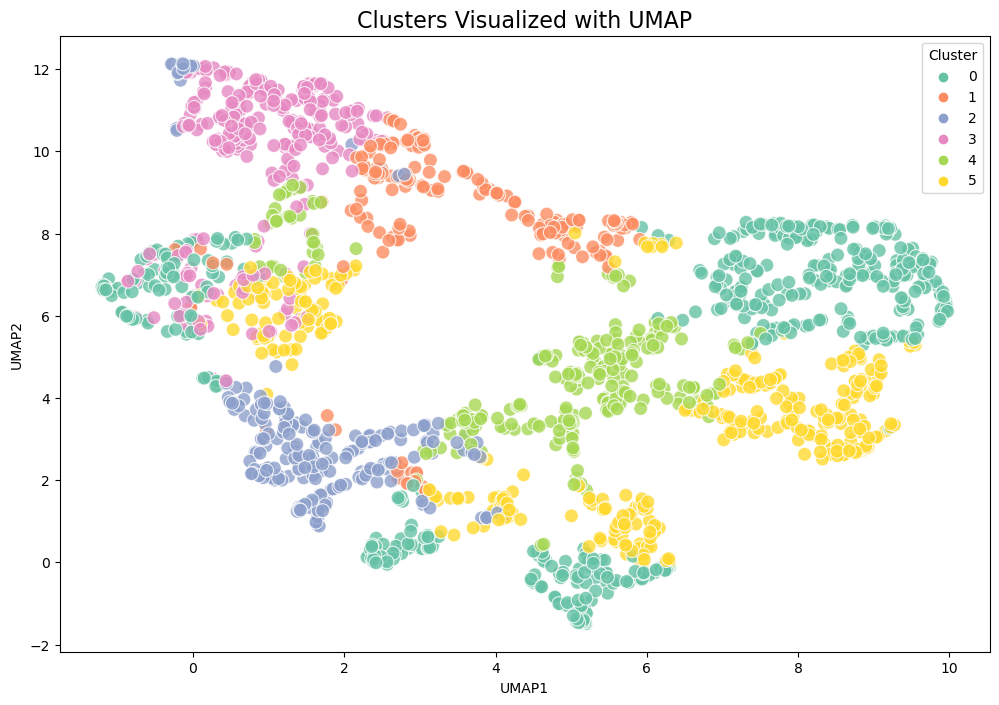

In [40]:
umap_reducer = umap.UMAP(random_state=42, n_neighbors=15, min_dist=0.1)
umap_embedding = umap_reducer.fit_transform(quality_scaled)

umap_df = pd.DataFrame(umap_embedding, columns=['UMAP1', 'UMAP2'])
umap_df['Cluster'] = clusters

# UMAP projection with clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='UMAP1', y='UMAP2', hue='Cluster', data=umap_df, palette='Set2', s=100, alpha=0.8
)
plt.title('Clusters Visualized with UMAP', fontsize=16)
plt.legend(title='Cluster', loc='best')
plt.show()

In [41]:
umap_reducer_3d = umap.UMAP(random_state=42, n_neighbors=15, min_dist=0.1, n_components=3)
umap_embedding_3d = umap_reducer_3d.fit_transform(quality_scaled)
# Use Plotly for 3D visualization
import plotly.express as px
umap_df_3d = pd.DataFrame(umap_embedding_3d, columns=['UMAP1', 'UMAP2', 'UMAP3'])
umap_df_3d['Cluster'] = clusters
fig = px.scatter_3d(umap_df_3d, x='UMAP1', y='UMAP2', z='UMAP3', color='Cluster')
fig.update_traces(marker=dict(size=5))
fig.show()


c:\Users\Ida\anaconda3\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [47]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Ensure data is scaled for DBSCAN
scaler = StandardScaler()
quality_scaled = scaler.fit_transform(quality[numeric_features])

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You may need to adjust these parameters
dbscan_labels = dbscan.fit_predict(quality_scaled)

# Add cluster labels to the original dataset
quality['DBSCAN_Cluster'] = dbscan_labels

# Cluster characteristics for DBSCAN (ignoring noise points labeled as -1)
dbscan_summary = quality[quality['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster')[numeric_features].mean()
print(dbscan_summary)



                order_purchase_delivered_days_0_0  \
DBSCAN_Cluster                                      
0                                        6.826638   
1                                        5.831243   
2                                        7.321944   
3                                        5.662186   
4                                       12.195551   
5                                        6.747534   
6                                        6.484188   
7                                        2.419987   
8                                        7.454076   
9                                        5.627697   
10                                      15.863477   
11                                       8.360018   
12                                       6.272678   
13                                       3.642455   
14                                       2.366842   
15                                      11.771032   
16                                       2.492

In [48]:
umap_reducer_3d = umap.UMAP(random_state=42, n_neighbors=15, min_dist=0.1, n_components=3)
umap_embedding_3d = umap_reducer_3d.fit_transform(quality_scaled)
# Use Plotly for 3D visualization
import plotly.express as px
umap_df_3d = pd.DataFrame(umap_embedding_3d, columns=['UMAP1', 'UMAP2', 'UMAP3'])
umap_df_3d['Cluster'] = clusters
fig = px.scatter_3d(umap_df_3d, x='UMAP1', y='UMAP2', z='UMAP3', color='Cluster')
fig.update_traces(marker=dict(size=5))
fig.show()

c:\Users\Ida\anaconda3\anaconda\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Using the statsmodels.api package we can see the results for OLS regression (Ordinary Least Squares).
it measures the relationship between dependent (reviews) and independent variables

In [57]:
numeric = [
    'order_purchase_delivered_days_0_0',
    'order_estimated_actual_delivered_days_0_0',
    'review_score_extended_1_0',
    'product_description_lenght_1_1',
    'product_photos_qty_1_1',
    'product_weight_g_1_1',
    'product_volume_cm3_1_1',
    'price_0_1'
]
data_numeric = quality[numeric]

X = data_numeric.drop(columns=['review_score_extended_1_0'])
y = data_numeric['review_score_extended_1_0']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                                OLS Regression Results                               
Dep. Variable:     review_score_extended_1_0   R-squared:                       0.032
Model:                                   OLS   Adj. R-squared:                  0.029
Method:                        Least Squares   F-statistic:                     9.276
Date:                       Sat, 14 Dec 2024   Prob (F-statistic):           2.44e-11
Time:                               15:07:55   Log-Likelihood:                -4320.3
No. Observations:                       1957   AIC:                             8657.
Df Residuals:                           1949   BIC:                             8701.
Df Model:                                  7                                         
Covariance Type:                   nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

## Key Results
R-squared (0.032):

Only 3.2% of the variability in the review score is explained by the model. While this is low, it’s not unusual for consumer reviews, where subjective and unmeasured factors often dominate.

Significant Predictors (P < 0.05):

order_purchase_delivered_days_0_0:
Coefficient: -0.0706
Interpretation: For every additional day between order purchase and delivery, the review score decreases by ~0.07, holding all other factors constant. This is statistically significant, suggesting faster delivery is associated with higher reviews.

price_0_1:
Coefficient: 0.0027
Interpretation: A unit increase in price is associated with a small but statistically significant increase in review score, possibly reflecting higher expectations for pricier products.

Non-significant Predictors (P > 0.05):

order_estimated_actual_delivered_days_0_0:
Not significant (P = 0.233), suggesting that delivering sooner than expected does not independently affect reviews.

product_description_lenght_1_1, product_photos_qty_1_1, product_weight_g_1_1, and product_volume_cm3_1_1:
These features are not statistically significant, indicating limited or no measurable impact on reviews in this dataset.

# Conclusions
### Delivery Speed Matters:

The negative relationship between order_purchase_delivered_days_0_0 and review scores suggests that improving delivery speed is a key area to enhance customer satisfaction.

### Price:

A slight positive relationship between price and review scores may indicate that higher-priced items receive marginally better reviews, possibly reflecting perceived quality or expectations.

### Other Features:

Factors like product weight, volume, and description length do not significantly influence review scores in this analysis. However, their impact might vary depending on the product category or customer segment.

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                                    Variable        VIF
0                                      const  12.547010
1          order_purchase_delivered_days_0_0   1.024104
2  order_estimated_actual_delivered_days_0_0   1.018631
3             product_description_lenght_1_1   1.046684
4                     product_photos_qty_1_1   1.023979
5                       product_weight_g_1_1   1.597260
6                     product_volume_cm3_1_1   1.508149
7                                  price_0_1   1.156745


The Variance Inflation Factor (VIF) values indicate that multicollinearity is not a significant concern in your model, as all VIF values are below the commonly accepted threshold of 5.